In [4]:
import pandas as pd 
import sqlite3

conn = sqlite3.connect(r"C:\Users\HP\Desktop\cornelius\im.db")

In [5]:
cur = conn.cursor()

In [19]:
#executing query
cur.execute("""
SELECT name 
FROM sqlite_master
WHERE type = "table";
""")

#fetching the results from the database
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [10]:
query = """
SELECT *
FROM movie_basics
"""

movie_basics = pd.read_sql(query, conn)
movie_basics.sample(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
92433,tt5343480,Año Cero,Año Cero,2015,83.0,Drama
51007,tt3022526,Le grimoire d'Arkandias,Le grimoire d'Arkandias,2014,91.0,"Adventure,Family"
96369,tt5619930,Kanawanu koi,Kanawanu koi,2016,NaN,None
138856,tt8954322,Should Could Dream,Should Could Dream,2018,70.0,Documentary
30861,tt2175685,Hakuchû no hitozuma: Okarareru kyonyû,Hakuchû no hitozuma: Okarareru kyonyû,2011,NaN,None
101414,tt5928846,Buttons,Buttons,2011,91.0,Documentary
110169,tt6448536,Porro Hecho En Colombia,Porro Hecho En Colombia,2015,NaN,None
11742,tt1640617,V3: Road Bully,V3: Samseng jalanan,2010,79.0,Action
36792,tt2338778,First Kiss,Rak sud tai pai na,2012,106.0,Romance
22976,tt1939671,Die Stämme von Köln,Die Stämme von Köln,2011,92.0,Documentary


In [11]:
#checking for null values
print(movie_basics.isnull().sum())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [12]:
query = """
SELECT start_year, runtime_minutes
FROM movie_basics
"""

movie_basics = pd.read_sql(query, conn)
movie_basics.head(10)

,start_year,runtime_minutes
0,2013,175.0
1,2019,114.0
2,2018,122.0
3,2018,NaN
4,2017,80.0
5,2018,75.0
6,2017,NaN
7,2017,83.0
8,2012,NaN
9,2012,82.0


In [14]:
#replacing null values in the column runtime_minutes with the mean of the column
column_name = "runtime_minutes"
mean = movie_basics[column_name].mean()
movie_basics[column_name].fillna(mean, inplace =True)

#converting the dataset into a csv file

movie_basics.to_csv("modified_dataset.csv", index = False)

movie_basics.sample(10)

,start_year,runtime_minutes
143693,2018,86.187247
87664,2015,61.000000
55343,2013,105.000000
117615,2019,123.000000
85577,2015,60.000000
55692,2013,58.000000
47335,2013,91.000000
33522,2012,107.000000
47699,2018,97.000000
143286,2019,86.187247


In [15]:
#checking to confirm that all null values have been replaced
print(movie_basics.isnull().sum())

start_year         0
runtime_minutes    0
dtype: int64


<AxesSubplot:xlabel='start_year', ylabel='runtime_minutes'>

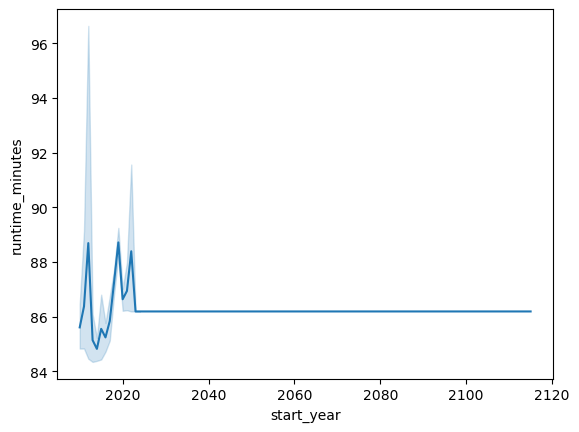

In [18]:
#plotting a histogram for start_year against runtime_minutes 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.lineplot(x=movie_basics["start_year"], y=movie_basics["runtime_minutes"])